In [49]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import scipy.stats as stats

In [31]:
# create a vector
tv = torch.tensor([ [1,2,3,4] ])
print(tv), print(' ')

# transpose it
print(tv.T), print(' ')

# transpose the transpose!
tvT = tv.T
print(tvT.T)

tensor([[1, 2, 3, 4]])
 
tensor([[1],
        [2],
        [3],
        [4]])
 
tensor([[1, 2, 3, 4]])


In [32]:
# repeat for a matrix
tM = torch.tensor([ [1,2,3,4],[5,6,7,8] ])
print(tM), print(' ')

# transpose it
print(tM.T), print(' ')

# transpose the transpose!
tMT = tM.T
print(tMT.T)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
 
tensor([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])
 
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


In [33]:
# create a vector
tv1 = torch.tensor([1,2,3,4])
tv2 = torch.tensor([0,1,0,-1])

# dot product via function
print(torch.dot(tv1,tv2))

# dot product via computation
print(torch.sum( tv1*tv2 ))

tensor(-2)
tensor(-2)


In [34]:
# create some random matrices
A  = torch.randn(3,4)
B  = torch.randn(4,5)
C1 = np.random.randn(4,7)
C2 = torch.tensor( C1,dtype=torch.float )


print(np.round( A@C1  ,2)), print(' ')
print(np.round( A@C2  ,2))

tensor([[ 2.4700,  0.3200, -2.4200,  1.1400,  2.0600,  0.9800,  0.9300],
        [ 2.9900, -0.5100, -2.8800, -0.1200,  0.1400, -1.3200,  3.6000],
        [-1.2100, -1.1800, -0.4900,  3.8000,  0.4800,  5.4700, -0.2700]],
       dtype=torch.float64)
 
tensor([[ 2.4700,  0.3200, -2.4200,  1.1400,  2.0600,  0.9800,  0.9300],
        [ 2.9900, -0.5100, -2.8800, -0.1200,  0.1400, -1.3200,  3.6000],
        [-1.2100, -1.1800, -0.4900,  3.8000,  0.4800,  5.4700, -0.2700]])


Using Numpy

In [35]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[-5  1 -4  9  9  6 12 -3  7  6 -1  9 -1  5 10 -2  0 -3 -5  0 -3 -3 -1 -5
  8]


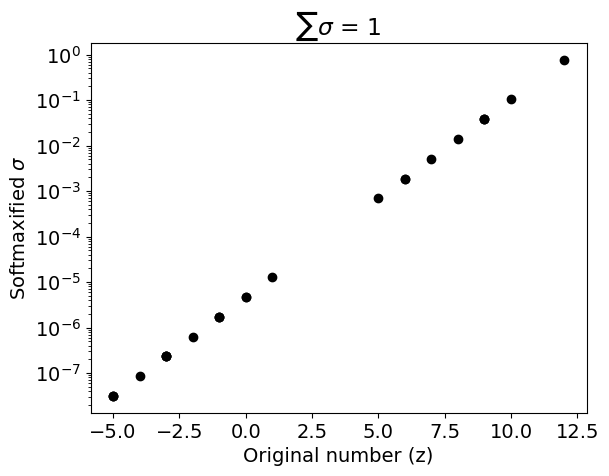

In [36]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

Using pytorch

In [37]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([3.1467e-08, 1.2695e-05, 8.5535e-08, 3.7842e-02, 3.7842e-02, 1.8840e-03,
        7.6008e-01, 2.3251e-07, 5.1214e-03, 1.8840e-03, 1.7180e-06, 3.7842e-02,
        1.7180e-06, 6.9310e-04, 1.0287e-01, 6.3203e-07, 4.6701e-06, 2.3251e-07,
        3.1467e-08, 4.6701e-06, 2.3251e-07, 2.3251e-07, 1.7180e-06, 3.1467e-08,
        1.3921e-02])


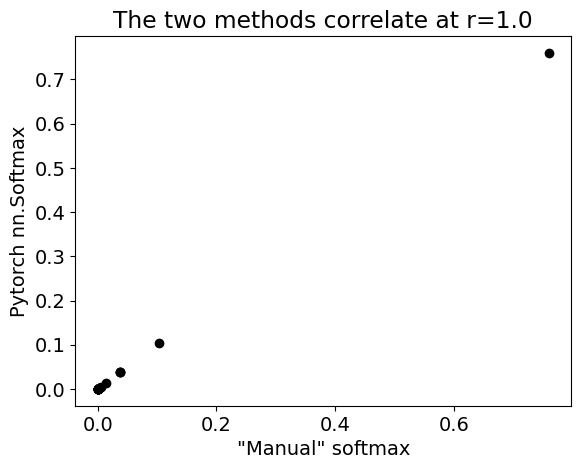

In [38]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()

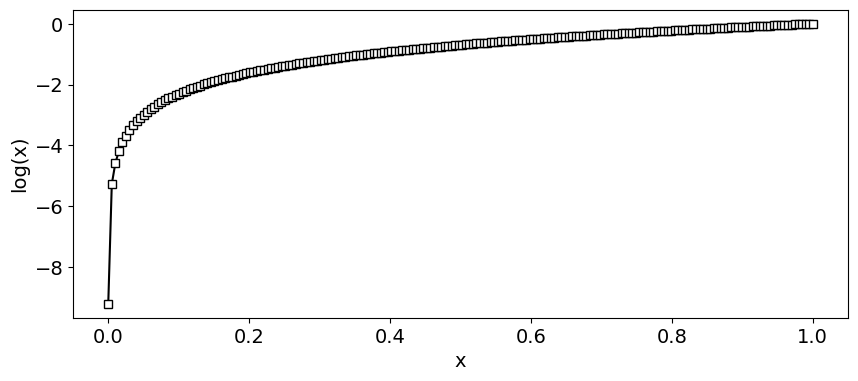

In [39]:
# define a set of points to evaluate
x = np.linspace(.0001,1,200)

# compute their log
logx = np.log(x)



# plot!
fig = plt.figure(figsize=(10,4))

# increase font size. FYI
plt.rcParams.update({'font.size':14})

plt.plot(x,logx,'ks-',markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

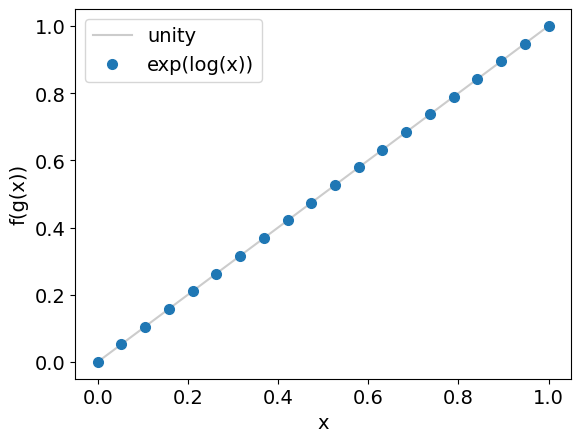

In [40]:
# demonstration that log and exp are inverses

# redefine with fewer points
x = np.linspace(.0001,1,20)

# log and exp
logx = np.log(x)
expx = np.exp(x)

# the plot
plt.plot(x,x,color=[.8,.8,.8])
plt.plot(x,np.exp(logx),'o',markersize=7)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity','exp(log(x))','log(exp(x))'])
plt.show()


# entropy:

$$H(p) = -\sum_x p(x)\log(p(x))$$

In [41]:
# computing entropy
x = [.25,.75]

H = 0
for p in x:
  H -= p*np.log(p)

print('Entropy: ' + str(H))

Entropy: 0.5623351446188083


In [42]:
# also correct, written out for N=2 events
H = -( p*np.log(p) + (1-p)*np.log(1-p) )
print('Entropy: ' + str(H))

Entropy: 0.5623351446188083


In [45]:
# probablilities
p = [1,0] # sum=1
q = [0.25,0.75] # sum=1

# converting to tensor datatypes
q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

#Calculating the cross entropy
F.binary_cross_entropy(p_tensor,q_tensor)

tensor(75.)

In [48]:
#Seeding
torch.manual_seed(44)
print(torch.randn(5))


tensor([ 0.0589, -1.3945,  0.8448,  0.1268,  1.0822])


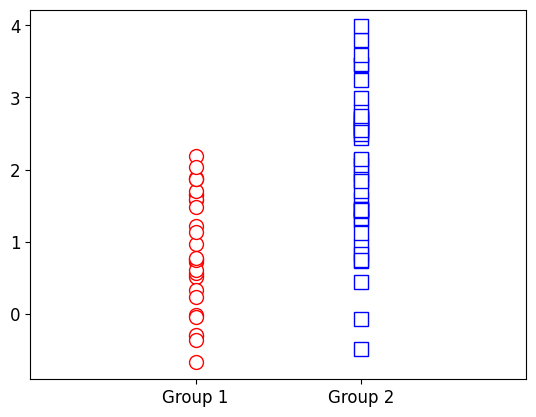

In [62]:
############## t-test #########################
# parameters 
n1 = 30
n2 = 40
mu1 = 1
mu2 = 2

#Generating data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)


#plotting them
plt.plot(np.zeros(n1), data1,'ro', markerfacecolor = 'w', markersize = 10)
plt.plot(np.ones(n2), data2,'bs', markerfacecolor = 'w', markersize = 10)
plt.xlim([-1,2])
plt.xticks([0,1],labels = ['Group 1','Group 2'])
plt.show()


In [63]:
#t-test via stats package

#_ind = independent samples

t, p = stats.ttest_ind(data1, data2)
print(t)
print(p)


-4.921331312999452
5.751277700822923e-06


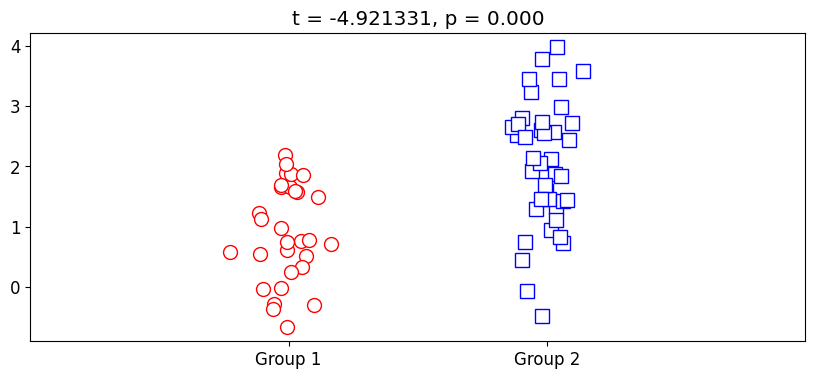

In [65]:
#common way to show t test results in plot

fig = plt.figure(figsize = (10,4))
plt.rcParams.update({'font.size':12})

plt.plot(0+np.random.randn(n1)/12, data1, 'ro', markerfacecolor = 'w', markersize = 10)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs', markerfacecolor = 'w', markersize = 10)
plt.xlim([-1,2])
plt.xticks([0,1], labels = ['Group 1', "Group 2"])

plt.title(f't = {t:2f}, p = {p:.3f}')

plt.show()

Visualisation Basics

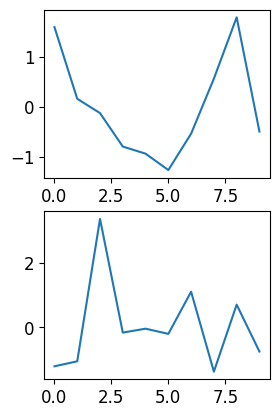

In [78]:
plt.subplot(2,2,1)
plt.plot(np.random.randn(10))
plt.subplot(2,2,3)
plt.plot(np.random.randn(10))
plt.show()

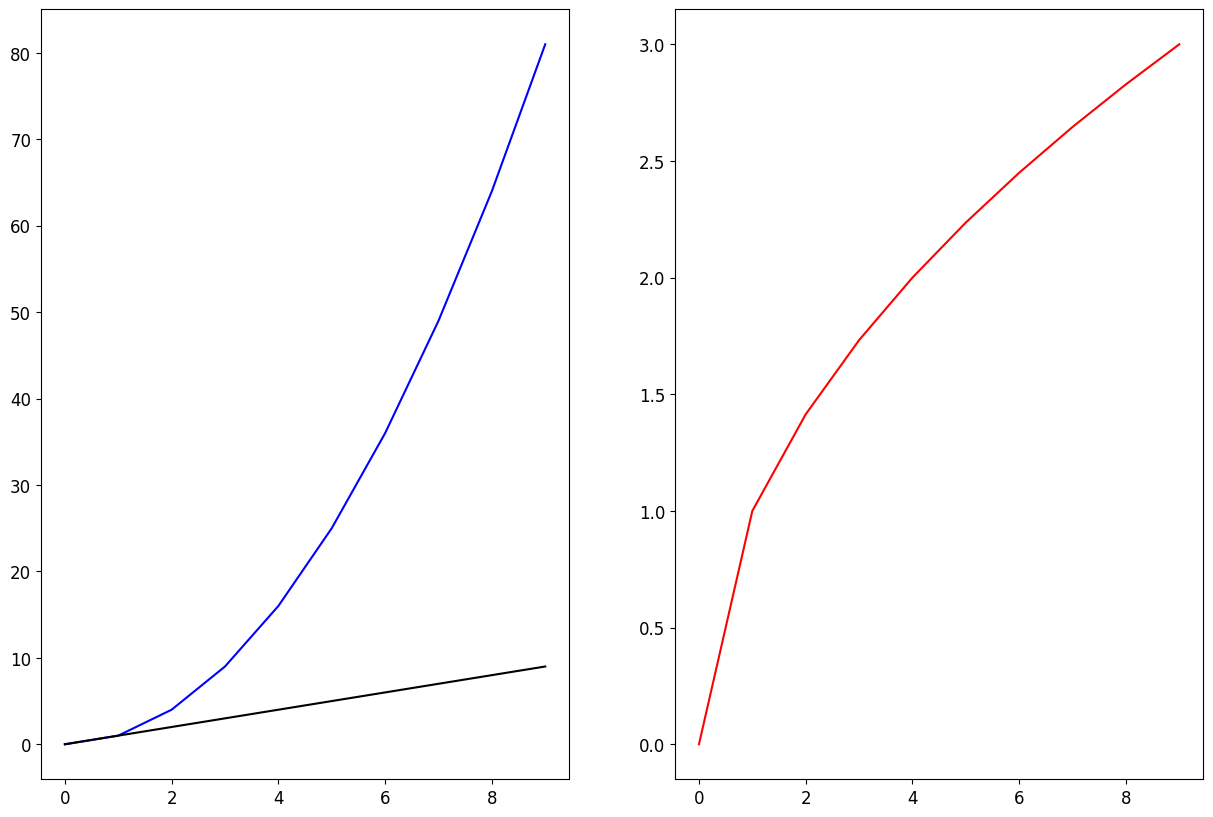

In [82]:
fig, ax = plt.subplots(1,2, figsize = (15,10))

x = np.arange(10)

ax[0].plot(x,x**2,'b')
ax[0].plot(x,x,'k')
ax[1].plot(x, np.sqrt(x),'r')

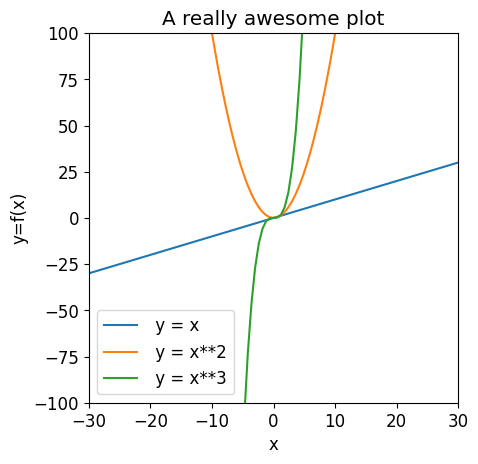

In [92]:
x = np.linspace (-30,30,101)

plt.plot(x,x,label = ' y = x')
plt.plot(x,x**2,label = ' y = x**2')
plt.plot(x,x**3,label = ' y = x**3')

plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.title('A really awesome plot')
plt.xlim([x[0],x[-1]])
plt.ylim([-100,100])
plt.show()



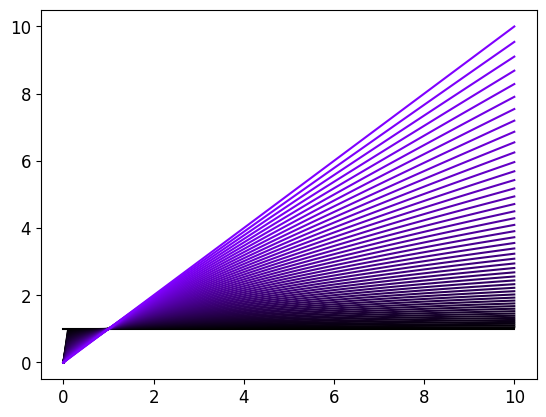

In [95]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 100)
for i in np.linspace(0,1,50):
    ax.plot(x,x**i, color = [i/2,0,i])

plt.show()

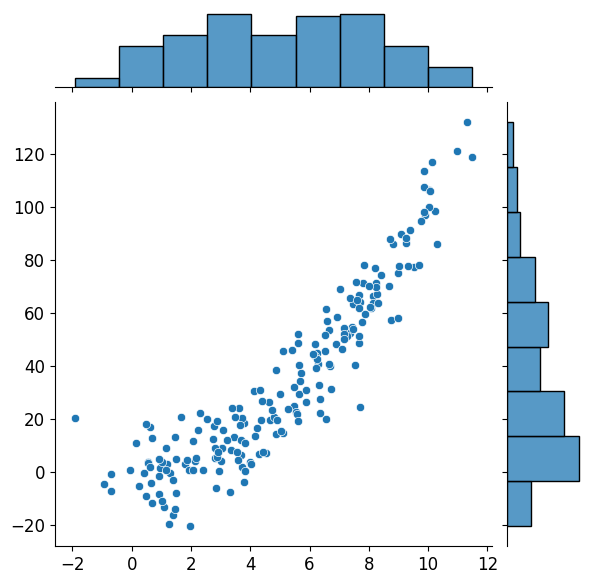

In [98]:
import seaborn as sns
n = 200
D = np.zeros((n,2))
D[:,0] = np.linspace(0,10,n) + np.random.randn(n)
D[:,1] = D[:,0]**2 + np.random.randn(n)*10

sns.jointplot(x = D[:,0],y = D[:,1])
plt.show()

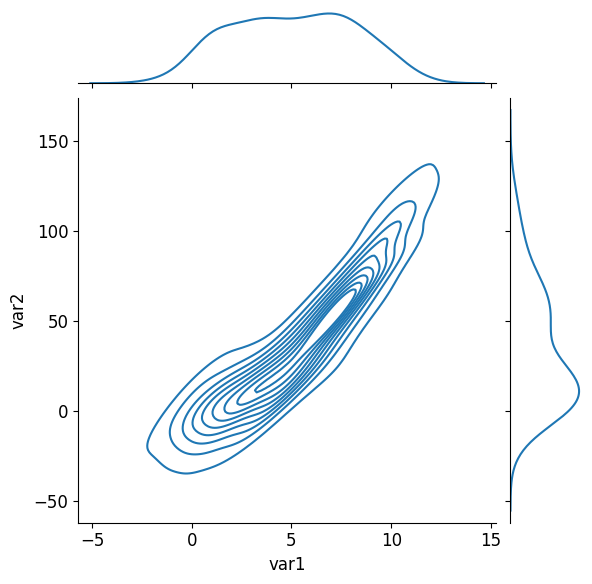

In [103]:
import pandas as pd
df = pd.DataFrame(data = D, columns = ['var1','var2'])
sns.jointplot(x = df.columns[0], y = df.columns[1], data = df, kind = 'kde')

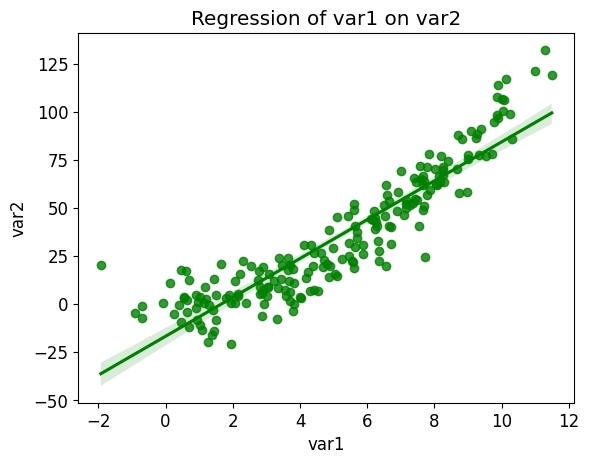

In [108]:
sns.regplot(df,x = df.columns[0],y = df.columns[1], color = 'green')
plt.title(f'Regression of {df.columns[0]} on {df.columns[1]}')
plt.show()

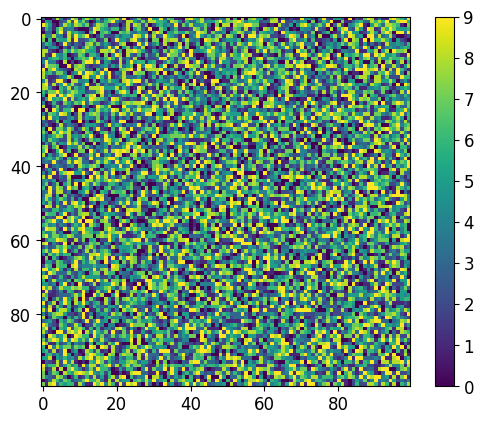

In [122]:
m = 100
n = 100

M = np.random.randint(10, size = (m,n))
M
plt.imshow(M)

# for i in range(m):
#     for j in range(n):
#         plt.text(j,i,str(M[i,j]), fontsize = 15, 
#                  horizontalalignment = 'center')
plt.colorbar()
plt.show()

C:\Users\raahu\AppData\Local\Temp\ipykernel_6160\4030328614.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread("https://upload.wikimedia.org/wikipedia/en/8/86/Einstein_tongue.jpg")


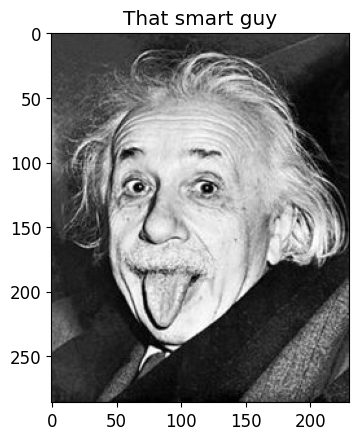

In [141]:
#from imageio import imread

img = imread("https://upload.wikimedia.org/wikipedia/en/8/86/Einstein_tongue.jpg")

plt.imshow(img, cmap = 'binary_r')
plt.title('That smart guy')
plt.show()

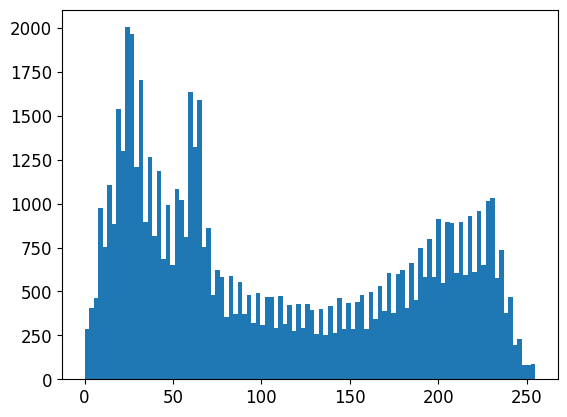

In [143]:
plt.hist(img.flatten(),bins = 100);

In [160]:
H = np.zeros((10,10))

for i in range(len(H)):
    for j in range(len(H)):
        H[i][j] = 1/(i+j+1)

<Axes: >

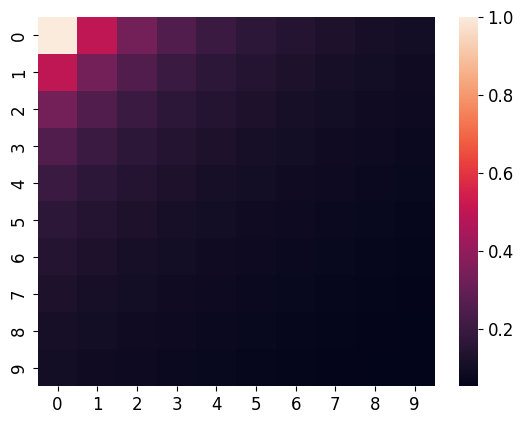

In [157]:
sns.heatmap(H)

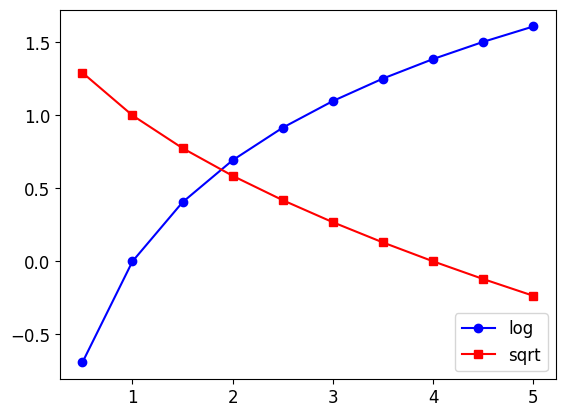

In [165]:

x = np.linspace(.5,5,10)
y1 = np.log(x)
y2 = 2 - np.sqrt(x)
plt.plot(x,y1,'bo-', label = 'log')
plt.plot(x,y2,'rs-',label = 'sqrt')

plt.legend()

         

In [167]:
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\raahu\AppData\Local\Temp\ipykernel_6160\2290422736.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


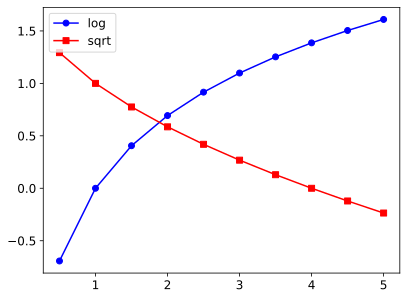

In [168]:
plt.plot(x,y1,'bo-', label = 'log')
plt.plot(x,y2,'rs-',label = 'sqrt')

plt.legend()

In [2]:
l1 = [1,2,3]
l2 = [5,4,3,2,1]
l1 = l2
l1

[5, 4, 3, 2, 1]